In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Analysis of Unified data

In [3]:
# loading the unified data

unified_df = pd.read_csv('../data/unified_dataset.csv')
unified_df.head()

,user_id,session_id,timestamp,session_length,messages_sent,feedback_rating,resources_clicked,recommendation_id,recommendation_type,click_through_rate,feedback_score,moderator_id,chat_sessions_moderated,avg_response_time,user_satisfaction_score,assigned_sessions
0,73d11f2f-56f9-437f-b720-bd5c2293c3a6,caa70dce-7c17-44d3-8afb-c773f2a015ac,2024-06-06 09:47:44.600128,107,30,4,3,NaN,NaN,NaN,NaN,3bcb2fe1-26e3-491a-8745-5f2791663051,485,17.77,2,22
1,704f6569-7263-4490-9eda-ae15a8a8c94c,d3f58575-5133-4f50-81b9-d40d10a2cc24,2024-10-12 15:28:14.926310,56,15,4,1,NaN,NaN,NaN,NaN,f2085ef9-b916-4e0b-8f97-7dfca18c31ad,493,10.96,3,22
2,75c93e70-8082-484b-a0b6-4ea590bddcb0,3943c73b-8652-4059-8bdc-01915c252841,2024-07-01 21:30:38.935476,97,27,3,1,8409e9ba-4816-4d9b-ae18-b17056a6863a,Blog,0.27,1.0,4fa1a78d-d849-4e4c-a082-90d2c076f14e,332,11.80,5,15
3,623dfbbc-a001-43d2-8ff2-8dba1a9f3642,45d45552-5852-426c-b7bb-c372d93a742d,2024-10-03 23:27:47.556656,19,34,4,2,NaN,NaN,NaN,NaN,92c090af-e40b-4a12-979f-d7ddc810686c,330,12.64,5,15
4,2f690ff2-f2cb-46e9-912e-8b04bfa292a1,2138d00d-f7d4-49c7-91aa-ac51a40e3508,2024-04-16 06:50:33.720596,111,38,3,0,NaN,NaN,NaN,NaN,5c15fc91-8e31-4347-b717-14a4177cbff1,256,8.35,2,12


In [4]:
# First of all, i wanted to analyze the joining rates of the unified data
unified_df.shape

(1106, 16)

In [5]:
# checking the null values
unified_df.isnull().sum()

user_id                      0
session_id                   0
timestamp                    0
session_length               0
messages_sent                0
feedback_rating              0
resources_clicked            0
recommendation_id          606
recommendation_type        606
click_through_rate         606
feedback_score             606
moderator_id                 0
chat_sessions_moderated      0
avg_response_time            0
user_satisfaction_score      0
assigned_sessions            0
dtype: int64

Based on this we can conclude that 606 users doesn't recieved any recommendations.

# Visualizations

In [8]:
# Before diving into visualizations, I wanted to understand the data.

print("Data Size:", unified_df.shape)
print("No of unique users:", unified_df['user_id'].nunique())
print("Average Session Length:", unified_df['session_length'].mean())	
print("Average Messages Sent:", unified_df['messages_sent'].mean())
print("Average Feedback Rating:", unified_df['feedback_rating'].mean())
print("Average Resources Clicked:", unified_df['resources_clicked'].mean())

print("Average Click Through Rate:", unified_df['click_through_rate'].mean())
print("Average Response Time:", unified_df['avg_response_time'].mean())
print("Average User Satisfaction Score:", unified_df['user_satisfaction_score'].mean())


Data Size: (1106, 16)
No of unique users: 1000
Average Session Length: 64.86528028933093
Average Messages Sent: 28.445750452079565
Average Feedback Rating: 3.453887884267631
Average Resources Clicked: 2.131103074141049
Average Click Through Rate: 0.51858
Average Response Time: 11.407359855334517
Average User Satisfaction Score: 3.2079566003616637


From this you can understand that, there are only 1000 users but there are multiple recommendations. For example, the single user maybe having two recommendations.

## Basic Visualizations to understand the distribution of data

In [24]:
# Functions for both categorical variable and numerical variables
def plot_bar_and_pie(feature):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots

    # Bar Chart
    sns.countplot(x=feature, order=feature.value_counts().index, palette="viridis", ax=axes[0])
    axes[0].set_xlabel(feature.name)
    axes[0].set_ylabel("Count")
    axes[0].set_title(f"Bar Chart of {feature.name}")

    # Pie Chart
    feature.value_counts().plot.pie(
        autopct="%1.1f%%", startangle=90, cmap="viridis", wedgeprops={'edgecolor': 'black'}, ax=axes[1]
    )
    axes[1].set_ylabel("")  
    axes[1].set_title(f"Pie Chart of {feature.name}")

    plt.tight_layout() 
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist(feature):
    plt.figure(figsize=(8, 5))
    sns.histplot(feature, kde=True, bins=20, color="royalblue")
    plt.xlabel(feature.name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature.name}")
    plt.show()



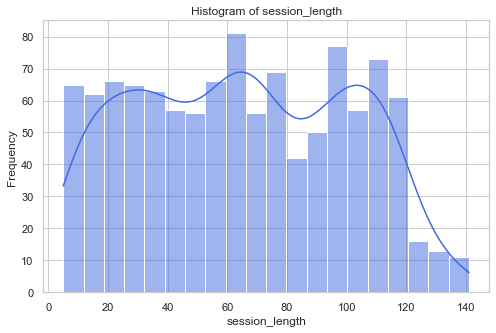

In [27]:
# Session Length Distribution
plot_hist(unified_df['session_length'])

It's almost having the similar distribution for all of session length's.

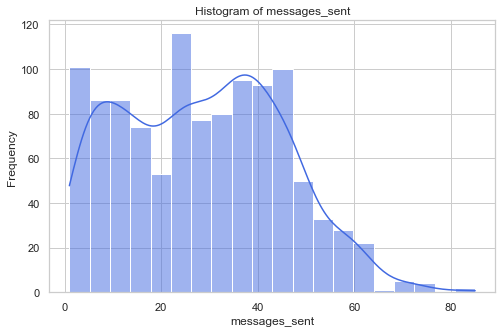

In [29]:
# messages_sent distribution
plot_hist(unified_df['messages_sent'])


Most users sent between 10 to 40 messages per session.

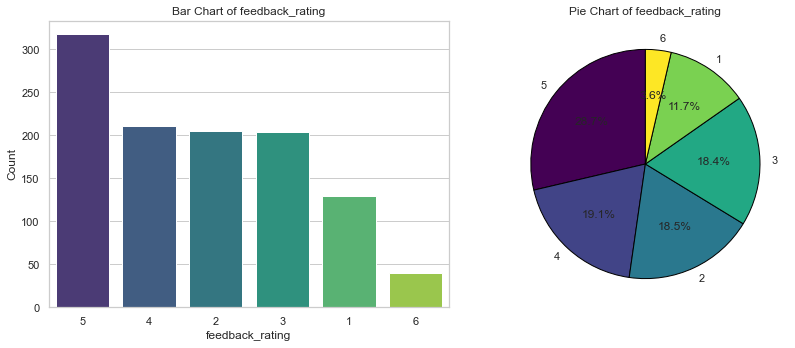

In [30]:
# feedback_rating
plot_bar_and_pie(unified_df['feedback_rating'])

Users given feedback between 1 to 6 where most of the users given 5(28.7%).

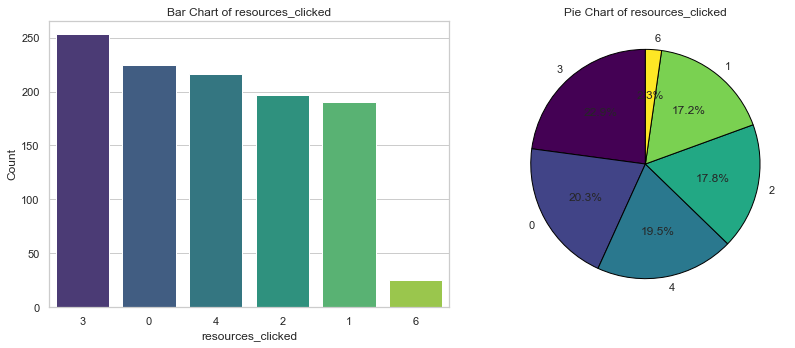

In [31]:
# resources_clicked
plot_bar_and_pie(unified_df['resources_clicked'])

It has almost the uniform distribution where users clicked between 1 to 4 resources.

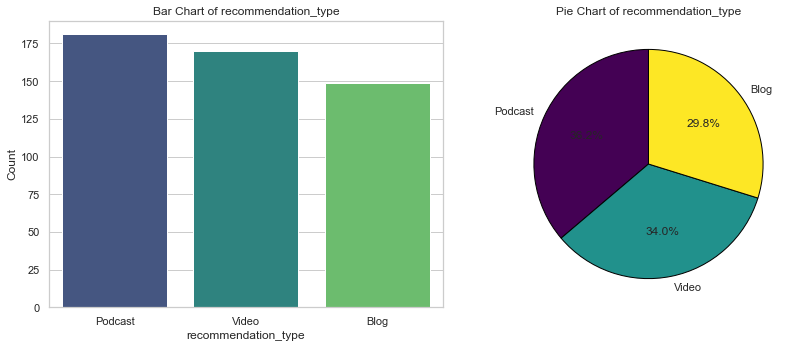

In [32]:
# recommendation_type
plot_bar_and_pie(unified_df['recommendation_type'])

Even the recommendations are uniform where Podcast's are more recommended for users.

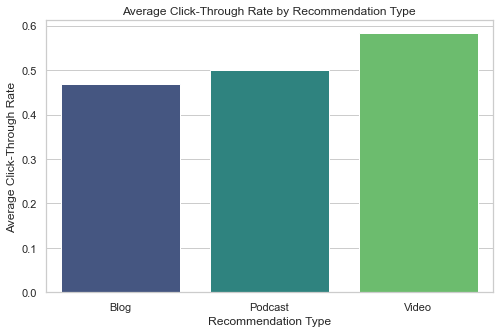

In [39]:
# Recommendation rate and its click through rate
avg_ctr = unified_df.groupby('recommendation_type')['click_through_rate'].mean().reset_index()
avg_feedback = unified_df.groupby('recommendation_type')['feedback_score'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='recommendation_type', y='click_through_rate', data=avg_ctr, palette="viridis")
plt.xlabel("Recommendation Type")
plt.ylabel("Average Click-Through Rate")
plt.title("Average Click-Through Rate by Recommendation Type")
plt.show()

Out of all the recommendations, videos has the highest average clickthrough rate.

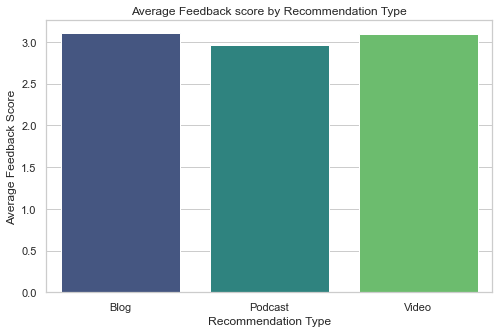

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='recommendation_type', y='feedback_score', data=avg_feedback, palette="viridis")
plt.xlabel("Recommendation Type")
plt.ylabel("Average Feedback Score")
plt.title("Average Feedback score by Recommendation Type")
plt.show()

Average feedback score is almost similar for every recommendation.

# User Engagement Analysis

To understand the how users are interacting with session platform

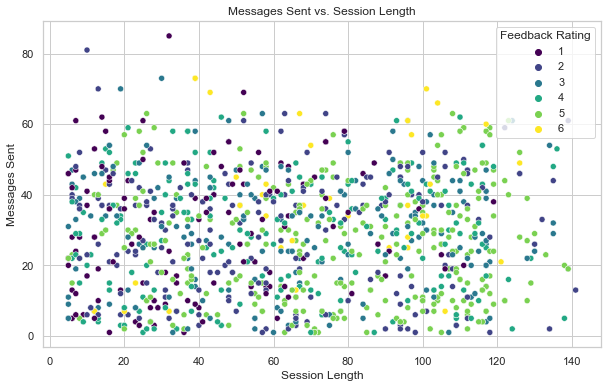

In [42]:
# To understand the correlation between messages sent vs session length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=unified_df, x='session_length', y='messages_sent', hue='feedback_rating', palette='viridis')
plt.title('Messages Sent vs. Session Length')
plt.xlabel('Session Length')
plt.ylabel('Messages Sent')
plt.legend(title='Feedback Rating')
plt.show()

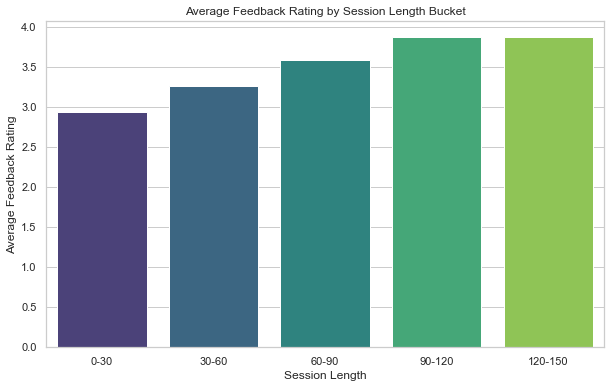

In [46]:
# Average feedback 
unified_df['session_length_bucket'] = pd.cut(unified_df['session_length'], bins=[0, 30, 60, 90, 120, 150], labels=['0-30', '30-60', '60-90', '90-120', '120-150'])
avg_feedback = unified_df.groupby('session_length_bucket')['feedback_rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_feedback, x='session_length_bucket', y='feedback_rating', palette='viridis')
plt.title('Average Feedback Rating by Session Length Bucket')
plt.xlabel('Session Length')
plt.ylabel('Average Feedback Rating')
plt.show()

# Recommendation Analysis

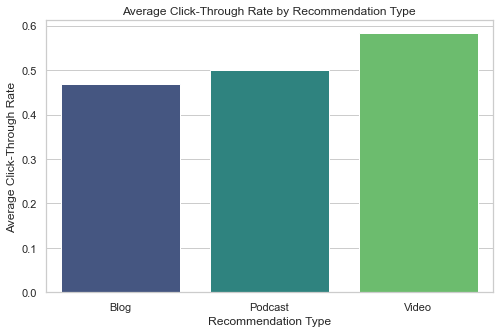

In [48]:
# Recommendation rate and its click through rate
avg_ctr = unified_df.groupby('recommendation_type')['click_through_rate'].mean().reset_index()
avg_feedback = unified_df.groupby('recommendation_type')['feedback_score'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='recommendation_type', y='click_through_rate', data=avg_ctr, palette="viridis")
plt.xlabel("Recommendation Type")
plt.ylabel("Average Click-Through Rate")
plt.title("Average Click-Through Rate by Recommendation Type")
plt.show()


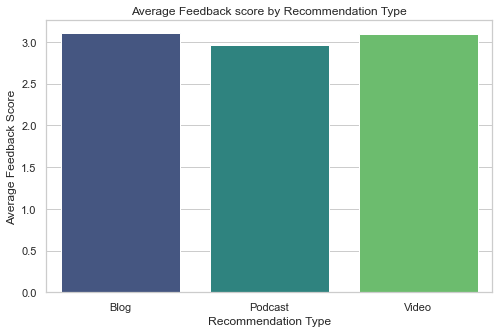

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x='recommendation_type', y='feedback_score', data=avg_feedback, palette="viridis")
plt.xlabel("Recommendation Type")
plt.ylabel("Average Feedback Score")
plt.title("Average Feedback score by Recommendation Type")
plt.show()

# Moderator Performance Analysis

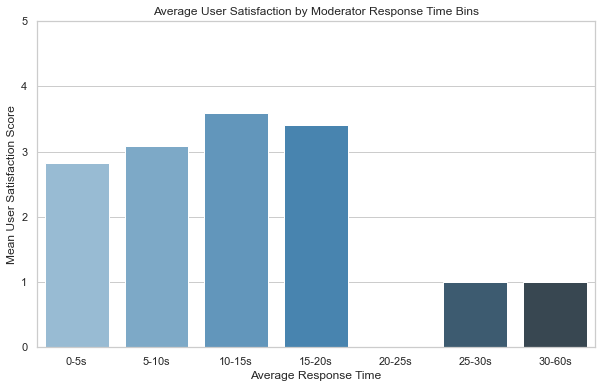

In [52]:
response_time_bins = [0, 5, 10, 15, 20, 25, 30, 60]
bin_labels = ['0-5s', '5-10s', '10-15s', '15-20s', '20-25s', '25-30s', '30-60s']
unified_df['response_time_bin'] = pd.cut(unified_df['avg_response_time'], bins=response_time_bins, labels=bin_labels)

# Calculate mean user satisfaction score for each response time bin
response_time_satisfaction = unified_df.groupby('response_time_bin')['user_satisfaction_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=response_time_satisfaction, x='response_time_bin', y='user_satisfaction_score', palette='Blues_d')
plt.title('Average User Satisfaction by Moderator Response Time Bins')
plt.xlabel('Average Response Time')
plt.ylabel('Mean User Satisfaction Score')
plt.ylim(0, 5)
plt.show()

# 4, Missing Recommendation Anlaysis

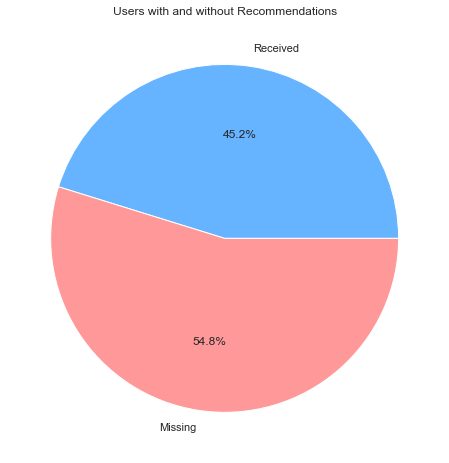

In [53]:
# Missing Recommendations
missing_recommendations = unified_df['recommendation_id'].isnull().sum()
received_recommendations = len(unified_df) - missing_recommendations

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie([received_recommendations, missing_recommendations], labels=['Received', 'Missing'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Users with and without Recommendations')
plt.show()


# Defining the metrics

In [ ]:

# Metrics1 - Per User Engagement Score
# This metric is used to calculate engagement score by giving importance to session length and message length and giving importance to feedback rating
# Use the 95th percentile to handle outliers globally
session_length_95 = unified_df['session_length'].quantile(0.95)
messages_sent_95 = unified_df['messages_sent'].quantile(0.95)

# Cap session length and messages at the 95th percentile
unified_df['capped_session_length'] = np.where(
    unified_df['session_length'] > session_length_95, session_length_95, unified_df['session_length']
)

unified_df['capped_messages_sent'] = np.where(
    unified_df['messages_sent'] > messages_sent_95, messages_sent_95, unified_df['messages_sent']
)

# Calculate Engagement Score per session
unified_df['engagement_score'] = (
    (unified_df['capped_session_length'] / session_length_95) * 0.4 +
    (unified_df['capped_messages_sent'] / messages_sent_95) * 0.4 +
    (unified_df['feedback_rating'] / 5) * 0.2
)

# Aggregate Engagement Score per user (average across sessions)
user_engagement = unified_df.groupby('user_id')['engagement_score'].mean().reset_index()
user_engagement.rename(columns={'engagement_score': 'avg_engagement_score'}, inplace=True)

# Per User Responsiveness Efficiency
# This metric is used to calclulate responsiveness efficieny by dividing avg_reponse_time and user_satisfaction_score. Finally diving by 5 to normalize it.
unified_df['responsiveness_efficiency'] = (
    (1 / (unified_df['avg_response_time'] + 1)) * (unified_df['user_satisfaction_score'] / 5)
)
user_responsiveness = unified_df.groupby('user_id')['responsiveness_efficiency'].mean().reset_index()
user_responsiveness.rename(columns={'responsiveness_efficiency': 'avg_responsiveness_efficiency'}, inplace=True)

# Per User Refined RCR
# This metric is used to calculate the engaged recommnedations per total users who recieved recommendations.
users_with_recommendations = unified_df[~unified_df['recommendation_id'].isnull()]
median_feedback_score = users_with_recommendations['feedback_score'].median()

# Identify engaged recommendations: click_through_rate > 0 and feedback_score > median
users_with_recommendations['engaged_recommendation'] = (
    (users_with_recommendations['click_through_rate'] > 0) & 
    (users_with_recommendations['feedback_score'] > median_feedback_score)
).astype(int)

# Calculate RCR per user
user_rcr = users_with_recommendations.groupby('user_id')['engaged_recommendation'].sum().reset_index()
total_recommendations_per_user = users_with_recommendations.groupby('user_id')['recommendation_id'].nunique().reset_index()
total_recommendations_per_user.rename(columns={'recommendation_id': 'total_recommendations'}, inplace=True)

# Merge engaged counts with total recommendations
user_rcr = pd.merge(user_rcr, total_recommendations_per_user, on='user_id', how='left')
user_rcr['refined_rcr'] = (user_rcr['engaged_recommendation'] / user_rcr['total_recommendations']) * 100
user_rcr = user_rcr[['user_id', 'refined_rcr']]

# Creating Metrics Dataset

# Merge all user-level metrics into a single DataFrame
user_metrics = user_engagement.merge(user_responsiveness, on='user_id', how='left')
user_metrics = user_metrics.merge(user_rcr, on='user_id', how='left')

# Fill any missing RCR values with 0 (for users without recommendations)
user_metrics['refined_rcr'] = user_metrics['refined_rcr'].fillna(0)

# Optional: Export the per-user metrics to CSV
user_metrics.to_csv('user_level_metrics.csv', index=False)
print("\nUser-level metrics have been saved as 'user_level_metrics.csv'.")


                                user_id  avg_engagement_score  \
0  001575dd-6eb3-4302-9baf-8365607f523b              0.613678   
1  00267898-7d73-4e81-9531-db40e2b702a3              0.646575   
2  00294711-8a9a-4467-9dd9-c0c85420e9a1              0.703609   
3  0079c607-7df9-4b93-ad77-539fa31c5859              0.551418   
4  008b37a1-0da8-44d2-ac9d-b17693dfbe7a              0.448207   

   avg_responsiveness_efficiency  refined_rcr  
0                       0.023460          0.0  
1                       0.006673          0.0  
2                       0.080580          0.0  
3                       0.080580          0.0  
4                       0.037559          0.0  

User-level metrics have been saved as 'user_level_metrics.csv'.
